In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/heartbeat'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [21]:
train_path = "/kaggle/input/heartbeat/mitbih_train.csv"
test_path  = "/kaggle/input/heartbeat/mitbih_test.csv"

train_df = pd.read_csv(train_path, header=None)
test_df  = pd.read_csv(test_path, header=None)


In [22]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [23]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]


187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


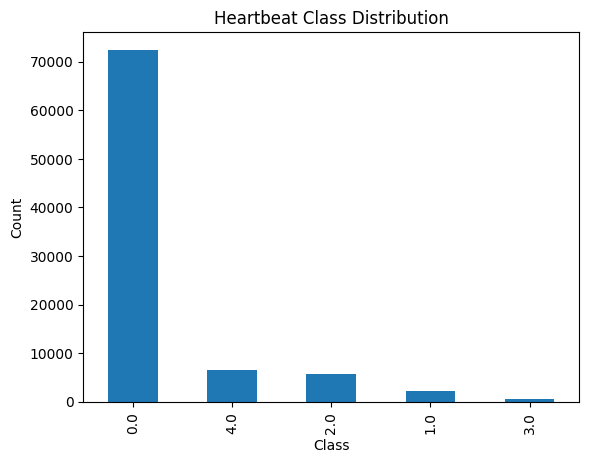

In [24]:
print(y_train.value_counts())
y_train.value_counts().plot(kind="bar")
plt.title("Heartbeat Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


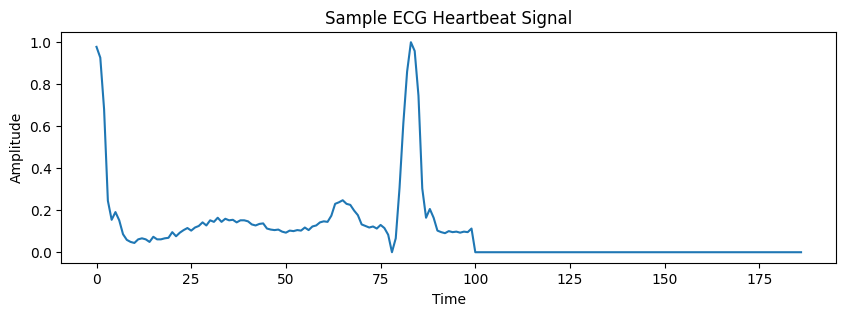

In [16]:
plt.figure(figsize=(10,3))
plt.plot(X_train.iloc[0].values)
plt.title("Sample ECG Heartbeat Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
model = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9147177050977526
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.83      0.41      0.55       556
         2.0       0.66      0.33      0.44      1448
         3.0       0.58      0.37      0.45       162
         4.0       0.96      0.88      0.92      1608

    accuracy                           0.91     21892
   macro avg       0.79      0.60      0.66     21892
weighted avg       0.90      0.91      0.90     21892

